In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

#### Auxiliary functions

In [2]:
def read_file(path: str, file_name: str):
  file = os.path.join(path, file_name)
  data = pd.read_csv(file, low_memory=False)
  return data

def find_nan_values(dataset) -> list:
  return dataset.columns[dataset.isnull().any()].tolist()

def drop_columns(dataset, columns):
  return dataset.drop(columns, axis=1)

def clean(dataset, columns):
  dataset_cleaned = drop_columns(dataset, columns)
  nan_values = find_nan_values(dataset_cleaned)
  for column in nan_values:
    dataset_cleaned[column].fillna(dataset[column].median(), inplace=True)

  Gender = pd.get_dummies(dataset['Sex'], drop_first=True)
  dataset_cleaned['Gender'] = Gender 
  return dataset_cleaned

### Logistic Regression

In [3]:
class LogisticRegression:
  def __init__(self, X, y, epochs, lerning_rate) -> None:
    self.X, self.y, self.lr = X, y, lerning_rate
    
    self.m, self.n = self.X.shape
    self.weight = np.zeros((self.n, 1))
    self.bias = 0
    self.epochs = epochs

    self.total_cost = []

  def linear_prediction(self, X):
    return np.dot(X, self.weight) + self.bias
  
  def sigmoid(self, linear_predicit):
    return 1/(1 + np.exp(-linear_predicit))
  
  def binary_cross_entropy(self, predict):
    return -(1/self.m) * np.sum(self.y * np.log(predict) + (1-self.y) * np.log(1-predict))
  
  def gradient(self, predict):
    error = predict - self.y

    dw = (1/self.m) * np.dot(self.X.T, error)
    db = (1/self.m) * np.sum(error)
    return dw, db
  
  def train(self):
    p_bar = tqdm(range(self.epochs))

    for _ in p_bar:
      linear_predict = self.linear_prediction(self.X)
      sigmoid_predict = self.sigmoid(linear_predict)
      dw, db = self.gradient(sigmoid_predict)
      self.weight = self.weight - self.lr * dw
      self.bias = self.bias - self.lr * db
      
      cost = self.binary_cross_entropy(sigmoid_predict)
      self.total_cost.append(cost)

#### Formulas
$ Linear Prediction = \sigma ( W^T*X + b ) $   

$ Sigmoid Function \sigma = \frac{1}{(1 + e^{-x})}  $

$ Binary Cross Entropy = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

$ dj/dw = 1/m\sum_{i=1}^m 2x_i(y_i - (wx_i + b))$

$ dj/db = 1/m\sum_{i=1}^m 2(y_i - (wx_i + b))$

In [4]:
train = pd.read_csv('./data/train.csv', low_memory=False)
test = pd.read_csv('./data/test.csv', low_memory=False)

print(*train.columns, sep=', ')

PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [5]:
columns_to_remove = (
    [
        'PassengerId',
        'Name',
        'SibSp',
        'Parch',
        'Ticket',
        'Fare',
        'Cabin',
        'Embarked'
    ]
)

train = clean(train, columns_to_remove)
test = clean(test, columns_to_remove)

In [6]:
train

,Survived,Pclass,Sex,Age,Gender
0,0,3,male,22.0,1
1,1,1,female,38.0,0
2,1,3,female,26.0,0
3,1,1,female,35.0,0
4,0,3,male,35.0,1
...,...,...,...,...,...
886,0,2,male,27.0,1
887,1,1,female,19.0,0
888,0,3,female,28.0,0
889,1,1,male,26.0,1


In [7]:
print(*train.columns, sep=', ')

Survived, Pclass, Sex, Age, Gender


In [8]:
X_train = train[['Pclass', 'Gender', 'Age']]
y_train = train[['Survived']]

X_train = X_train.values
y_train = y_train.values

X_test = test[['Pclass', 'Gender', 'Age']]

X_test = X_test.values


print('Shape X_train: ', X_train.shape)
print('Shape y_train: ', y_train.shape)

Shape X_train:  (891, 3)
Shape y_train:  (891, 1)


In [9]:
model = LogisticRegression(X_train, y_train, 1000, 0.001)
model.train()

100%|██████████| 1000/1000 [00:00<00:00, 14728.54it/s]


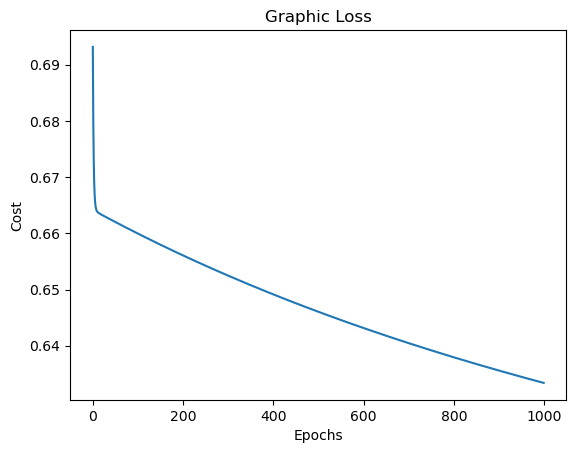

In [10]:
plt.plot(np.arange(model.epochs), model.total_cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Graphic Loss')
plt.show()

In [11]:
Pclass = 1; Gender = 1 ;Age = 22

predict = model.linear_prediction([Pclass, Gender, Age])
predict = model.sigmoid(predict)
print('Probability to survive: ', predict[0]*100,'%')

Probability to survive:  41.15617387868228 %
